In [26]:
from datasets import load_dataset
import pandas as pd
import matplotlib.pyplot as plt
from wordcloud import WordCloud
import seaborn as sns
from sklearn.model_selection import train_test_split

## Data Read

In [2]:
df = pd.read_csv('/Users/kuruba.ajay/Documents/Experiments/image_to_text/data/en.openfoodfacts.org.products.csv',sep='\t',on_bad_lines='skip')
print(df.head())  # Display first few rows
print(df.shape)

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/4135232417.py:1: DtypeWarning: Columns (0,11,17,32,33,34,35,36,46,51,53,54,68,73) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv('/Users/kuruba.ajay/Documents/Experiments/image_to_text/data/en.openfoodfacts.org.products.csv',sep='\t',on_bad_lines='skip')


  code                                                url  creator  \
0   54  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
1   63  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
2  114  http://world-en.openfoodfacts.org/product/0000...  kiliweb   
3    1  http://world-en.openfoodfacts.org/product/0000...      inf   
4  105  http://world-en.openfoodfacts.org/product/0000...  kiliweb   

    created_t      created_datetime  last_modified_t last_modified_datetime  \
0  1582569031  2020-02-24T18:30:31Z       1733085204   2024-12-01T20:33:24Z   
1  1673620307  2023-01-13T14:31:47Z       1739902555   2025-02-18T18:15:55Z   
2  1580066482  2020-01-26T19:21:22Z       1737247862   2025-01-19T00:51:02Z   
3  1634745456  2021-10-20T15:57:36Z       1743233868   2025-03-29T07:37:48Z   
4  1572117743  2019-10-26T19:22:23Z       1738073570   2025-01-28T14:12:50Z   

  last_modified_by  last_updated_t last_updated_datetime  ...  \
0              NaN    1.740205e+09  202

In [3]:
df.info(verbose=True)

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 3774583 entries, 0 to 3774582
Data columns (total 207 columns):
 #    Column                                                 Dtype  
---   ------                                                 -----  
 0    code                                                   object 
 1    url                                                    object 
 2    creator                                                object 
 3    created_t                                              int64  
 4    created_datetime                                       object 
 5    last_modified_t                                        int64  
 6    last_modified_datetime                                 object 
 7    last_modified_by                                       object 
 8    last_updated_t                                         float64
 9    last_updated_datetime                                  object 
 10   product_name                                        

## Working on states columns

In [4]:
## Dropping rows with states columns as null
df = df.dropna(subset=['states'])
df.shape

(3774580, 207)

In [5]:
## Drop with image nutrition url
df = df.dropna(subset=['image_nutrition_url'])
df.shape

(1914224, 207)

In [6]:
df = df[df['states'].str.replace(" ", "").str.contains("en:nutrition-facts-completed")]
df.shape

(1808645, 207)

## Removing columns with 50% of Missing Values 

In [7]:
pd.set_option('display.max_rows', 200)

In [8]:
missing_values = df.isnull().sum()
missing_percentage = (missing_values / len(df)) * 100

missing_data = pd.DataFrame({
    'columns': df.columns,
    'Missing Values': missing_values,
    'Percentage': missing_percentage
}).sort_values(by='Percentage', ascending=False)

missing_data[missing_data['Missing Values'] > 0]

,columns,Missing Values,Percentage
allergens_en,allergens_en,1808645,100.000000
cities,cities,1808645,100.000000
additives,additives,1808643,99.999889
nutrition-score-uk_100g,nutrition-score-uk_100g,1808642,99.999834
elaidic-acid_100g,elaidic-acid_100g,1808639,99.999668
glycemic-index_100g,glycemic-index_100g,1808638,99.999613
chlorophyl_100g,chlorophyl_100g,1808636,99.999502
water-hardness_100g,water-hardness_100g,1808635,99.999447
erucic-acid_100g,erucic-acid_100g,1808635,99.999447
caproic-acid_100g,caproic-acid_100g,1808633,99.999337


In [9]:
threshold = 50
columns_to_drop = missing_data[missing_data['Percentage'] > threshold]['columns'].tolist()
df = df.drop(columns=columns_to_drop, axis=1)

In [10]:
df.shape

(1808645, 40)

## Removing columns that are not required

In [11]:
columns_not_required = ['creator', 'created_t', 'created_datetime', 'last_modified_t', 'last_modified_datetime', 'last_modified_by', 'last_updated_t', 
                        'last_updated_datetime', 'states', 'states_tags', 'states_en', 'last_image_datetime', 'url', 'brands', 'brands_tags', 'brands_en', 
                        'countries', 'countries_tags', 'countries_en', 'nutriscore_grade', 'environmental_score_grade', 'completeness', 'last_image_t', 'image_url', 
                        'image_small_url', 'product_name']

In [12]:
df.drop(columns_not_required,axis=1,inplace=True)

In [13]:
df.shape

(1808645, 14)

In [14]:
df.columns

Index(['code', 'pnns_groups_1', 'pnns_groups_2', 'image_nutrition_url',
       'image_nutrition_small_url', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [15]:
df.head()

,code,pnns_groups_1,pnns_groups_2,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
2,114,unknown,unknown,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,2415.0,44.0,28.0,30.0,27.0,7.1,0.025,0.01
3,1,unknown,unknown,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2,Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,335.0,392.0,5.6,0.6,7.5,6.2,2.3,0.400,0.16
6,3,unknown,unknown,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,4,Sugary snacks,Biscuits and cakes,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,100.0,2401.0,0.0,0.0,26.0,15.0,1.0,0.000,0.00


In [16]:
# Fill NaN: 0 for numerical columns, 'Not Known' for object or category types
for col in df.columns:
    if pd.api.types.is_numeric_dtype(df[col]):
        df[col] = df[col].fillna(0)
    else:
        df[col] = df[col].fillna("unknown")

## EDA - Univairate Analysis

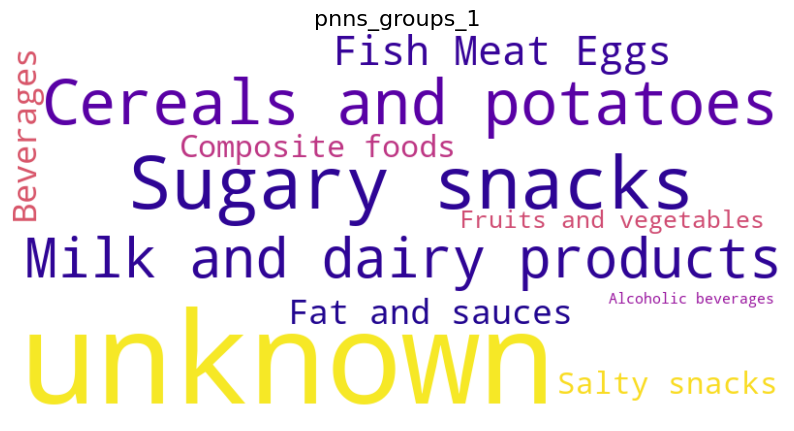

In [17]:
# Calculate frequency counts
freq = df['pnns_groups_1'].value_counts().to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(freq)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('pnns_groups_1', fontsize=16)
plt.xlabel('categories', fontsize=12)
plt.show()

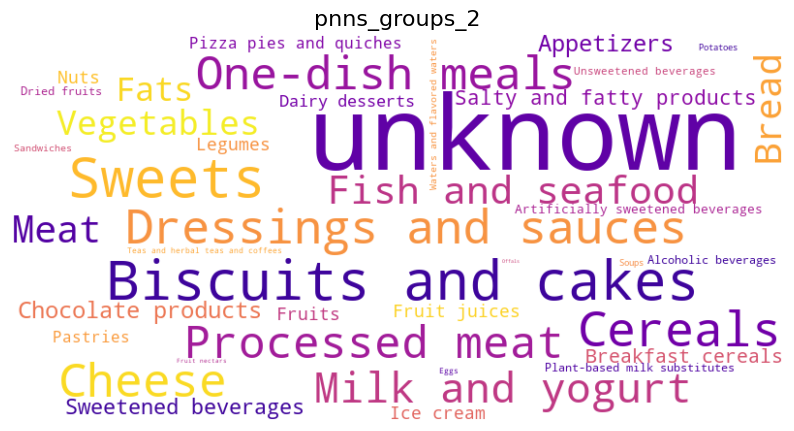

In [18]:
# Calculate frequency counts
freq = df['pnns_groups_2'].value_counts().to_dict()

# Generate word cloud
wordcloud = WordCloud(width=800, height=400, background_color='white', colormap='plasma').generate_from_frequencies(freq)

# Plot
plt.figure(figsize=(10, 6))
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis('off')
plt.title('pnns_groups_2', fontsize=16)
plt.xlabel('categories', fontsize=12)
plt.show()

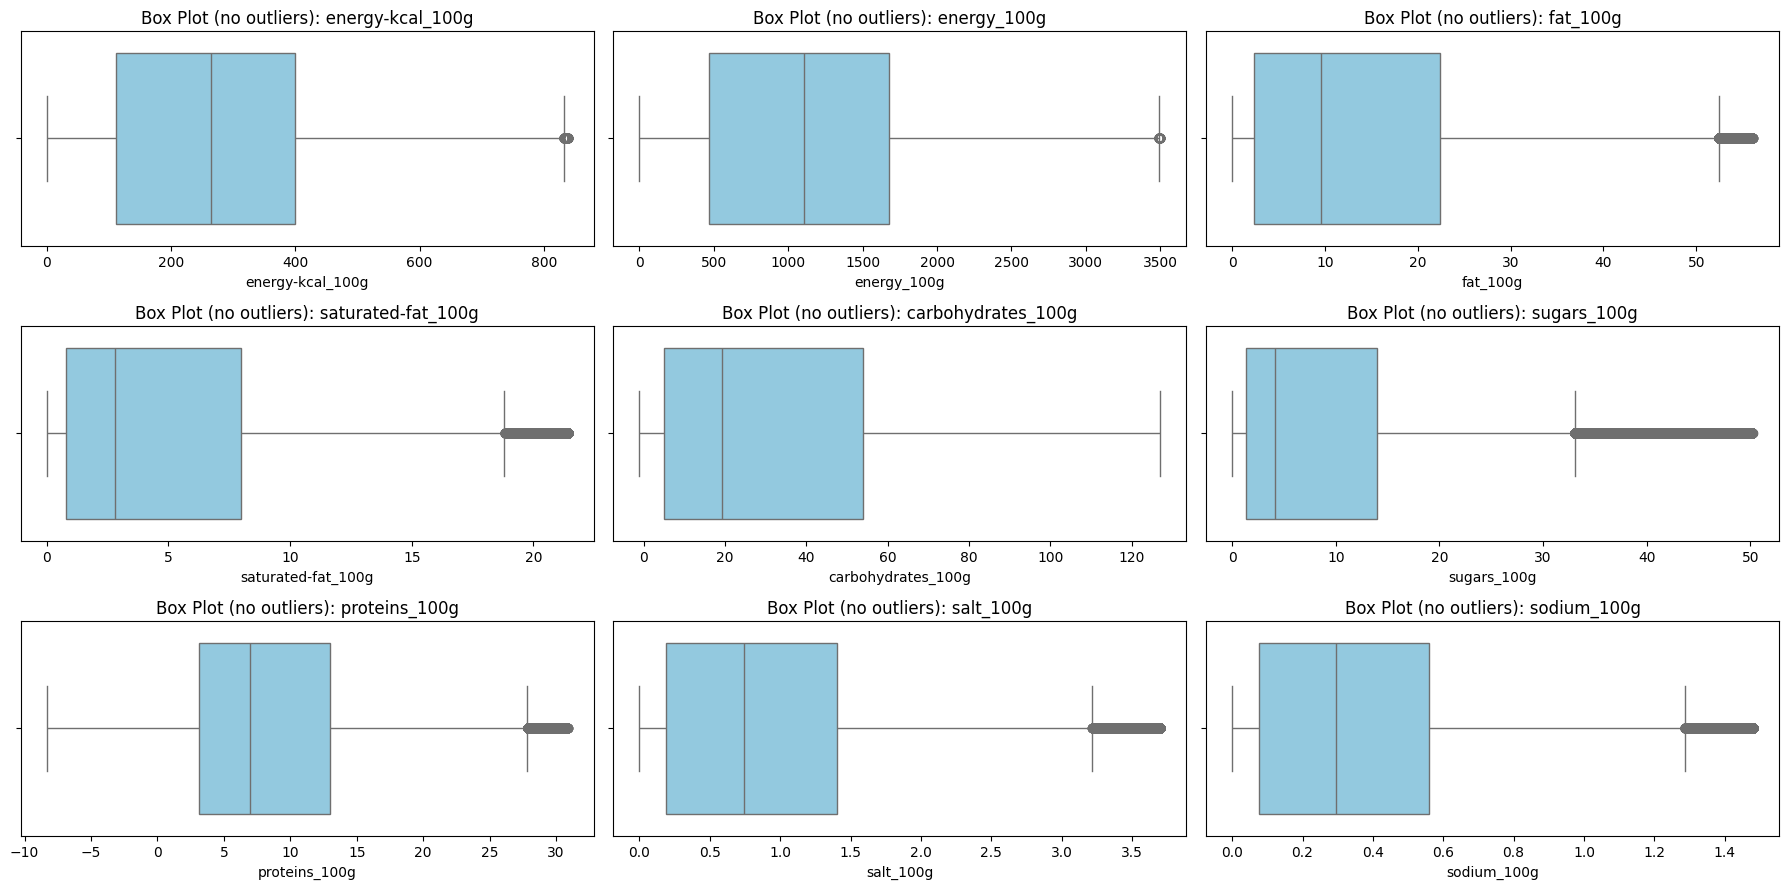

In [19]:
# Select numerical columns
num_cols = df.select_dtypes(include='number').columns

# Create subplots
n_cols = 3
n_rows = -(-len(num_cols) // n_cols)
fig, axes = plt.subplots(n_rows, n_cols, figsize=(6 * n_cols, 3 * n_rows))
axes = axes.flatten()

for i, col in enumerate(num_cols):
    data = df[col]
    data_nonzero = data[data != 0].dropna()

    if not data_nonzero.empty:
        # Remove extreme outliers using IQR
        Q1 = data_nonzero.quantile(0.25)
        Q3 = data_nonzero.quantile(0.75)
        IQR = Q3 - Q1
        lower_bound = Q1 - 1.5 * IQR
        upper_bound = Q3 + 1.5 * IQR
        filtered_data = data_nonzero[(data_nonzero >= lower_bound) & (data_nonzero <= upper_bound)]

        if not filtered_data.empty:
            sns.boxplot(x=filtered_data, ax=axes[i], color='skyblue')
            axes[i].set_title(f'Box Plot (no outliers): {col}')
            axes[i].set_xlabel(col)
        else:
            axes[i].set_visible(False)
    else:
        axes[i].set_visible(False)

# Hide unused subplots
for j in range(i + 1, len(axes)):
    axes[j].set_visible(False)

plt.tight_layout()
plt.show()

## EDA - Bivariate analysis

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/734597535.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')


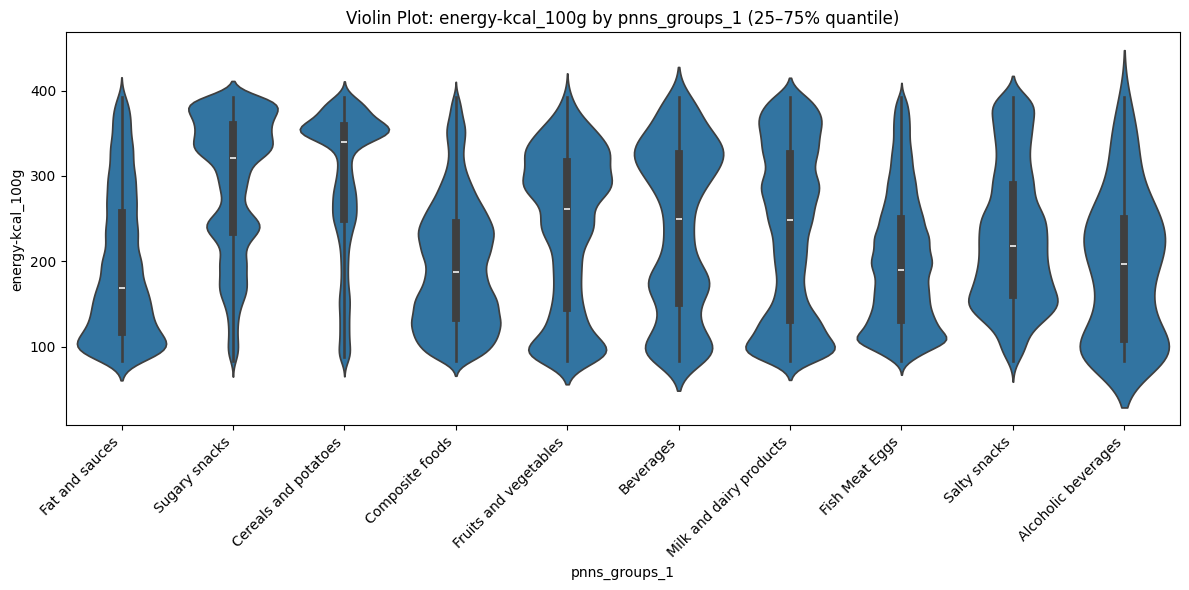

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/734597535.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')


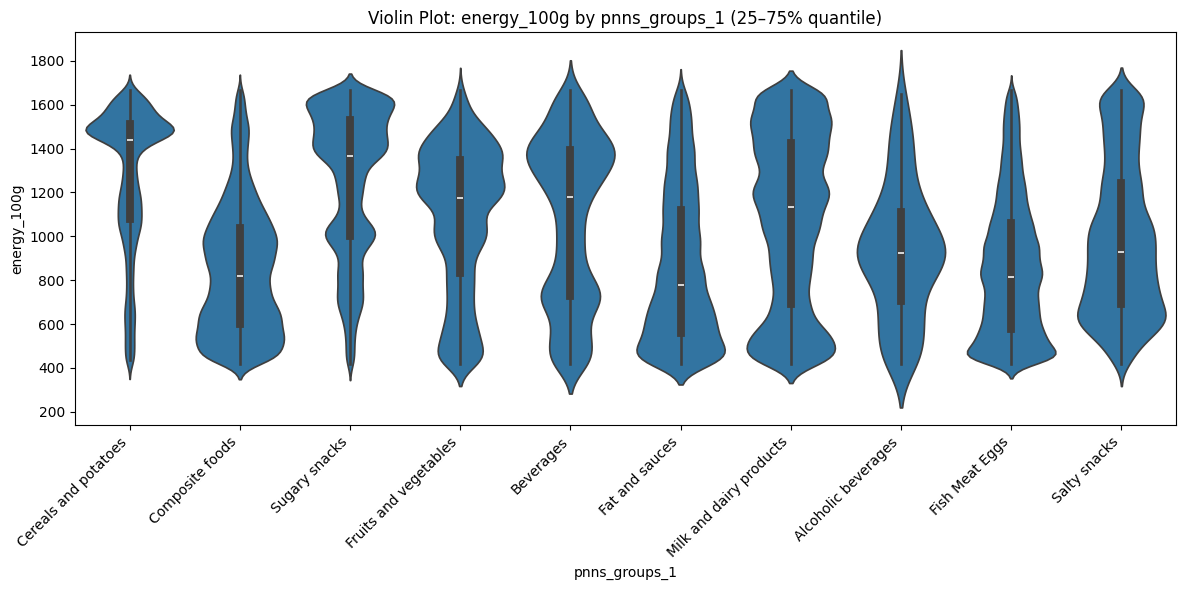

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/734597535.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')


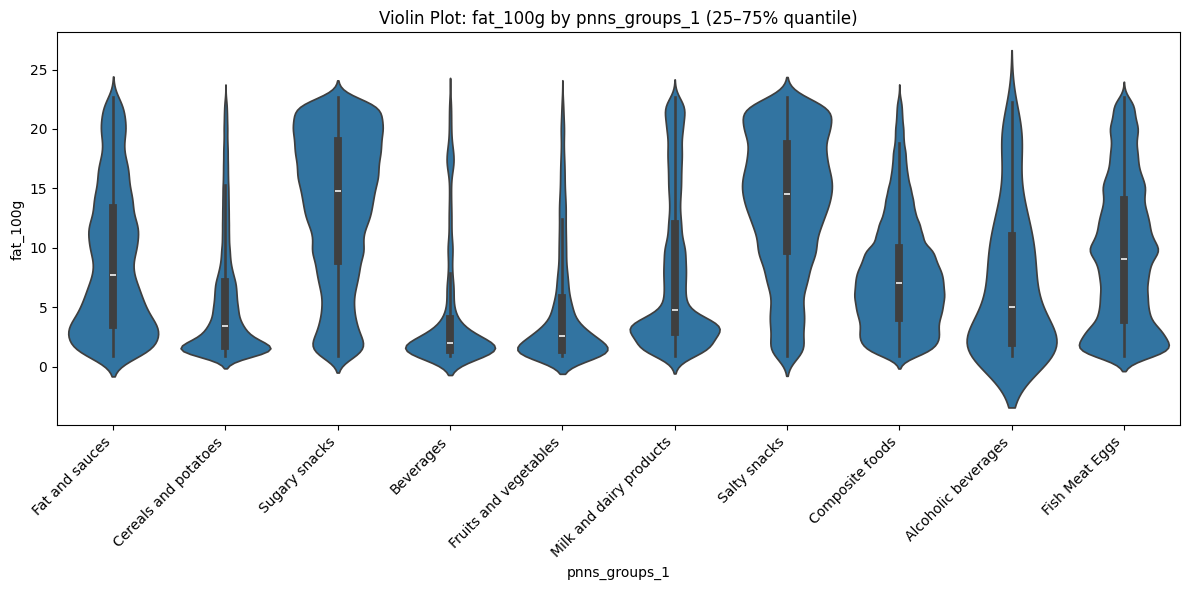

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/734597535.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')


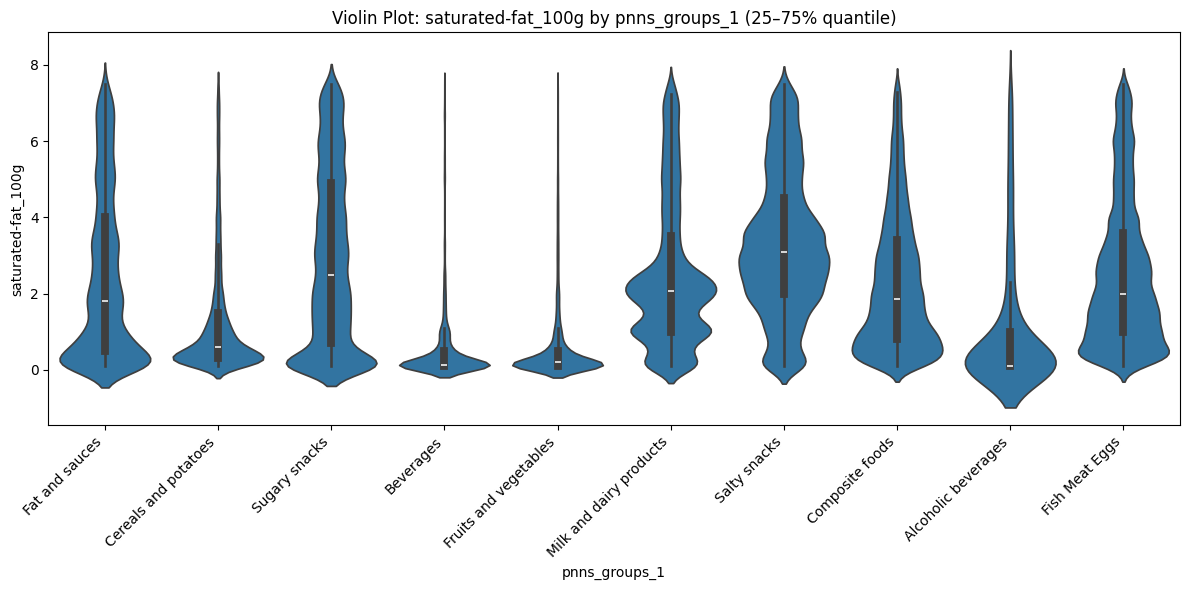

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/734597535.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')


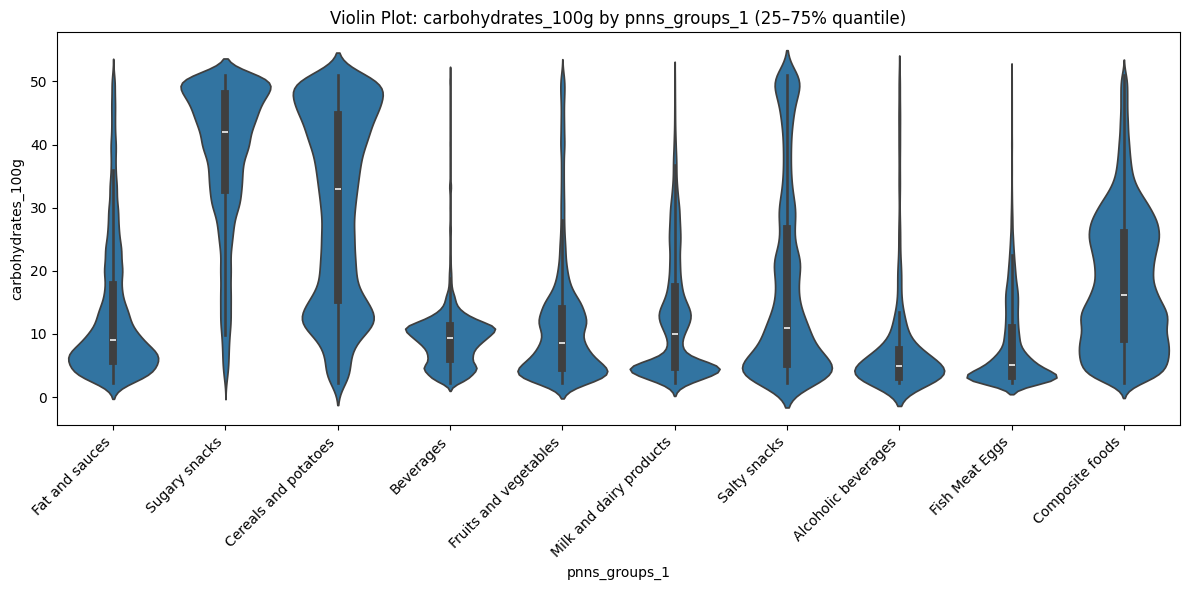

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/734597535.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')


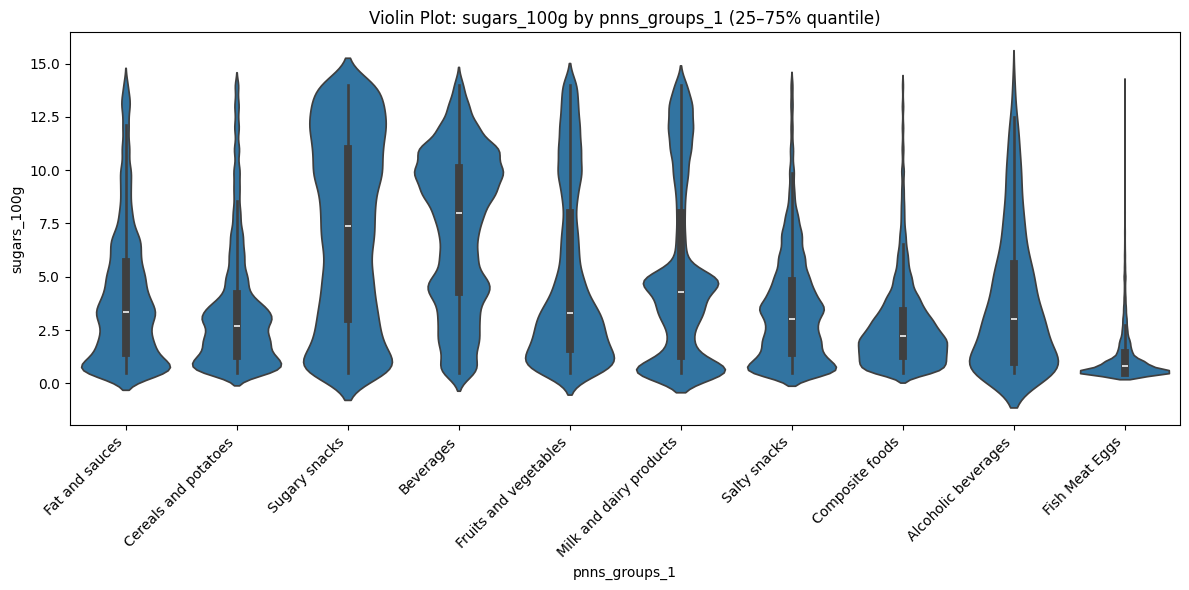

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/734597535.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')


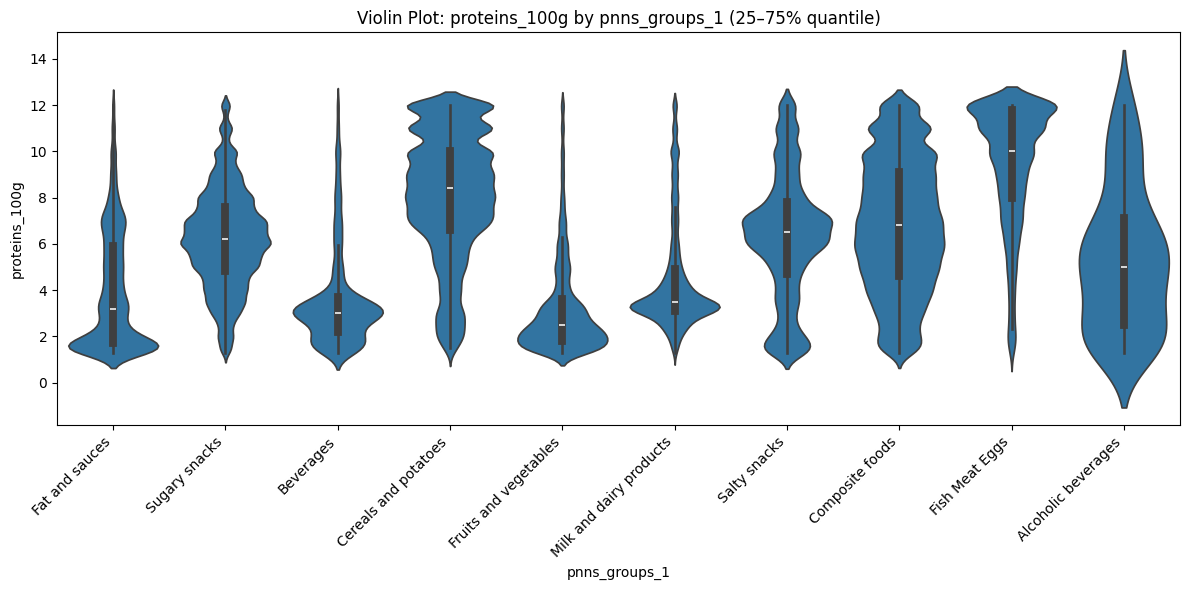

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/734597535.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')


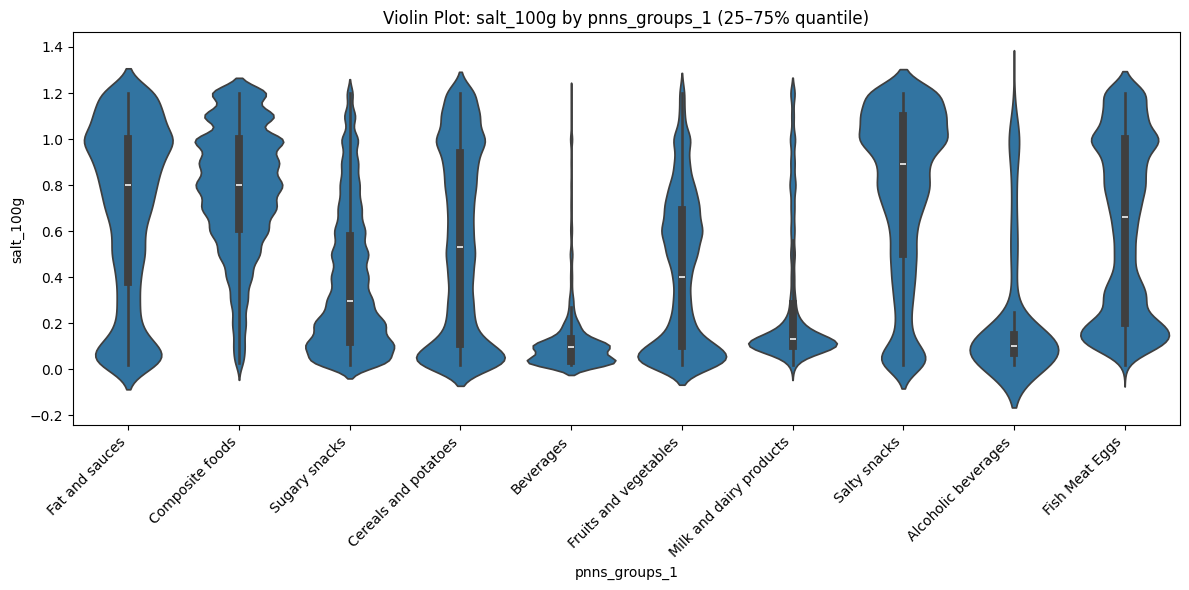

/var/folders/rc/29mf23w504dbnknkdwgpp60w0000gp/T/ipykernel_85513/734597535.py:15: FutureWarning: 

The `scale` parameter has been renamed and will be removed in v0.15.0. Pass `density_norm='width'` for the same effect.
  sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')


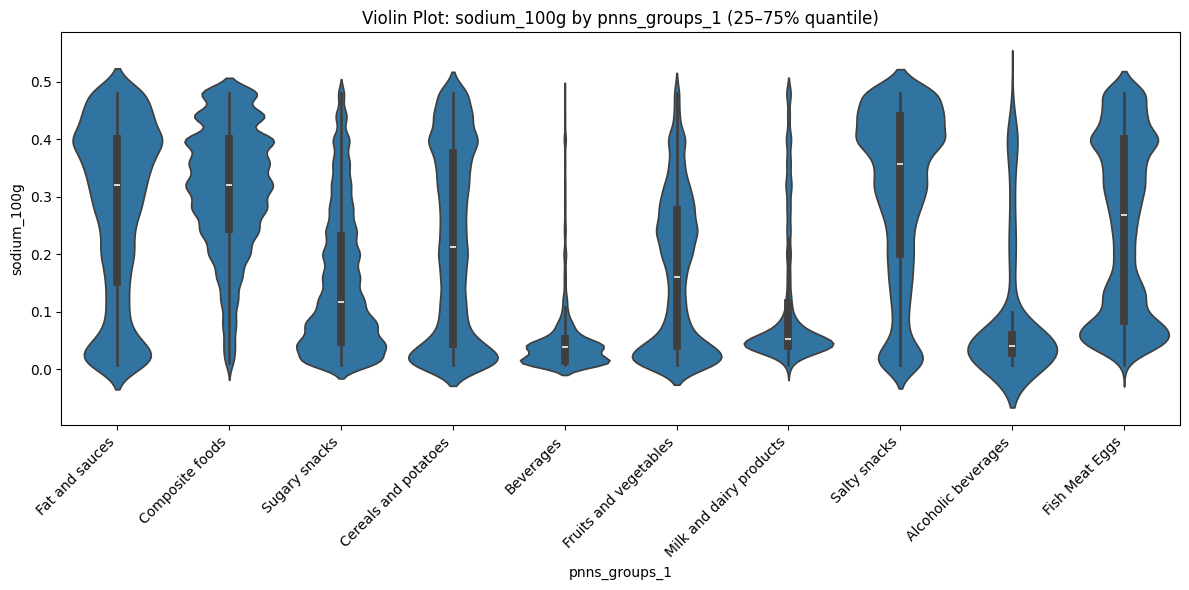

In [20]:
# Settings
cat_col = 'pnns_groups_1'
num_cols = df.select_dtypes(include='number').columns

# Optional: remove "unknown" category if needed
df_removed_unknown = df[df[cat_col] != 'unknown']

for col in num_cols:
    df_col = df_removed_unknown[[cat_col, col]].dropna()
    q25 = df_col[col].quantile(0.25)
    q75 = df_col[col].quantile(0.75)
    df_filtered = df_col[(df_col[col] >= q25) & (df_col[col] <= q75)]

    plt.figure(figsize=(12, 6))
    sns.violinplot(x=cat_col, y=col, data=df_filtered, inner='box', scale='width')
    plt.xticks(rotation=45, ha='right')
    plt.title(f'Violin Plot: {col} by {cat_col} (25–75% quantile)')
    plt.tight_layout()
    plt.show()

## Preprocessed data for training

In [21]:
df.head()

,code,pnns_groups_1,pnns_groups_2,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
2,114,unknown,unknown,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,2415.0,44.0,28.0,30.0,27.0,7.1,0.025,0.01
3,1,unknown,unknown,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00
5,2,Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,335.0,392.0,5.6,0.6,7.5,6.2,2.3,0.400,0.16
6,3,unknown,unknown,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00
7,4,Sugary snacks,Biscuits and cakes,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,100.0,2401.0,0.0,0.0,26.0,15.0,1.0,0.000,0.00


In [22]:
df.columns

Index(['code', 'pnns_groups_1', 'pnns_groups_2', 'image_nutrition_url',
       'image_nutrition_small_url', 'energy-kcal_100g', 'energy_100g',
       'fat_100g', 'saturated-fat_100g', 'carbohydrates_100g', 'sugars_100g',
       'proteins_100g', 'salt_100g', 'sodium_100g'],
      dtype='object')

In [23]:
df.head()

,code,pnns_groups_1,pnns_groups_2,image_nutrition_url,image_nutrition_small_url,energy-kcal_100g,energy_100g,fat_100g,saturated-fat_100g,carbohydrates_100g,sugars_100g,proteins_100g,salt_100g,sodium_100g
2,114,unknown,unknown,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,2415.0,44.0,28.0,30.0,27.0,7.1,0.025,0.01
3,1,unknown,unknown,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00
5,2,Fat and sauces,Dressings and sauces,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,335.0,392.0,5.6,0.6,7.5,6.2,2.3,0.400,0.16
6,3,unknown,unknown,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,0.0,0.0,0.0,0.0,0.0,0.0,0.0,0.000,0.00
7,4,Sugary snacks,Biscuits and cakes,https://images.openfoodfacts.org/images/produc...,https://images.openfoodfacts.org/images/produc...,100.0,2401.0,0.0,0.0,26.0,15.0,1.0,0.000,0.00


In [27]:
# First split into train+val and test
random_state=42
train_val_df, test_df = train_test_split(
    df,
    test_size=0.15,
    stratify=df['pnns_groups_1'],
    random_state=random_state
)

# Then split train+val into train and val
train_df, val_df = train_test_split(
    train_val_df,
    test_size=0.15,
    stratify=train_val_df['pnns_groups_1'],
    random_state=random_state
)

In [37]:
def save_columns_to_json(df, columns, output_file):
    df[columns].to_json(output_file, orient='records', indent=4)

In [34]:
# Columns to include
cols = [
    'energy-kcal_100g', 'energy_100g', 'fat_100g', 'saturated-fat_100g',
    'carbohydrates_100g', 'sugars_100g', 'proteins_100g',
    'salt_100g', 'sodium_100g'
]

# Create JSON column
train_df['nutrition_json'] = train_df[cols].apply(lambda row: row.to_dict(), axis=1)
val_df['nutrition_json'] = val_df[cols].apply(lambda row: row.to_dict(), axis=1)
test_df['nutrition_json'] = test_df[cols].apply(lambda row: row.to_dict(), axis=1)

In [35]:
!pwd

/Users/kuruba.ajay/Documents/Experiments/image_to_text/Notebooks


In [41]:
sub_train_df = train_df.iloc[:100]

In [38]:
save_columns_to_json(train_df, ['code', 'image_nutrition_url', 'nutrition_json'], '/Users/kuruba.ajay/Documents/Experiments/image_to_text/data/train.json')
save_columns_to_json(val_df, ['code', 'image_nutrition_url', 'nutrition_json'], '/Users/kuruba.ajay/Documents/Experiments/image_to_text/data/validation.json')
save_columns_to_json(test_df, ['code', 'image_nutrition_url', 'nutrition_json'], '/Users/kuruba.ajay/Documents/Experiments/image_to_text/data/test.json')

In [42]:
save_columns_to_json(sub_train_df, ['code', 'image_nutrition_url', 'nutrition_json'], '/Users/kuruba.ajay/Documents/Experiments/image_to_text/data/sub_train.json')

In [39]:
train = pd.read_json('/Users/kuruba.ajay/Documents/Experiments/image_to_text/data/train.json')